# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### Dataset Overview

The dataset I've selected for analysis is a collection of information about 10,000 movies sourced from The Movie Database (TMDb). It encompasses a variety of details, such as user ratings, revenue, cast, genres, and more.

One aspect to note is that certain columns, such as 'cast' and 'genres', contain multiple values separated by pipe (|) characters. This indicates that a movie may have multiple actors or genres associated with it.
Another important feature of the dataset is the presence of odd characters in the 'cast' column. However, the cleaning of these characters is not necessary for the analysis, and they can be left as they are.

Additionally, the dataset includes two final columns ending with "_adj", which display the budget and revenue of each movie in terms of 2010 dollars. These adjusted values account for inflation over time, allowing for more meaningful comparisons of financial figures across movies of different eras.

>### Questions

In this report, I plan to explore the relationship between user ratings (dependent variable) and several independent variables to gain insights into factors that influence the popularity of movies. The three independent variables I will focus on are budget, genre, and release year.

1. Does a higher budget lead to better ratings?

2. Are certain genres consistently more popular among audiences? Does the genre of a movie significantly affect its rating?

3. Are newer movies more likely to receive higher ratings, indicating evolving tastes and expectations? Conversely, are there timeless classics that maintain consistently high ratings over the years?

By examining these three independent variables in relation to user ratings, we can uncover insights into the dynamics of movie success and audience reception. The analysis will provide a nuanced understanding of the factors that contribute to a movie's popularity, helping filmmakers, studios, and enthusiasts make informed decisions and predictions about audience preferences.

In [60]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
def plot_correlation_heatmap(df):
    # Compute the coefficient matrix (correlation matrix)
    corr_matrix = df.corr()

    # Create a heatmap of the coefficient matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Coefficient Matrix')
    plt.show()

<a id='wrangling'></a>
## Data Wrangling

Once the dataset is loaded, I will utilize Pandas to employ various methods that aid in understanding and gaining intuition about the dataset. Following this exploration, I will initiate the cleaning process to retain only the pertinent data that is relevant to the questions I intend to address during the analysis. Any unused or extraneous data will be removed from the dataset to streamline the subsequent analysis.

> ### General Properties

In [61]:
#loading the csv file and storing it in 'df'
df = pd.read_csv('tmdb-movies.csv')

#printing first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [62]:
#printing the last three rows
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [63]:
#The dimensions of the dataset
df.shape

(10866, 21)

In [64]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [65]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [66]:
# quicker look at the ttoal amoutn of NaN values
df.isnull().sum().sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

In [67]:
# check for duplicates in the data
sum(df.duplicated())

1

In [68]:
# although the datatype for release_date appears to be object in Pandas, further
# investigation shows it's a string

type(df['release_date'][0])

str

> ### Data Cleaning

> ##### 1. Remove Unnecessary Columns
 such as 'id', 'imdb_id', 'homepage', 'director', 'runtime', 'budget', 'production_companies', 'tagline', 'keywords', 'production_companies', 'runtime', and 'cast'.

In [69]:
# a list of columns we want to remove
del_col = [ 'id', 'imdb_id', 'homepage','runtime', 'budget', 'revenue', 'production_companies', 'tagline', 'keywords', 'runtime', 'cast']

#deleting the columns from the database
df = df.drop(del_col, 1)

# previewing the new dataset
df.head(3)

<ipython-input-69-947eb87e6424>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(del_col, 1)


,popularity,original_title,director,overview,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> ##### 2. Changing 'release date' column from string to date format.

In [70]:
df.release_date = pd.to_datetime(df['release_date'])

# checkeing the changed date column in the dataset
df.head(3)

,popularity,original_title,director,overview,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


> ##### 3. Removing duplicate values.

In [71]:
df.drop_duplicates(keep ='first', inplace=True)

rows, col = df.shape

print('There are now {} total entries in our dataset after removing the duplicates.'.format(rows-1, col))

There are now 10864 total entries in our dataset after removing the duplicates.


> ##### 4. Changing format of budget and revenue columns from float to big int64.

In [72]:
change_type=['budget_adj', 'revenue_adj']

#changing data type
df[change_type]=df[change_type].applymap(np.int64)

#printing data types of the dataset to see the changed information
df.dtypes

popularity               float64
original_title            object
director                  object
overview                  object
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

> ##### 5. Replace all the values from '0'/NaN with mean value 'budget' and 'revenue' columns.

In [73]:
budget_mean = df['budget_adj'].mean()
revenue_mean = df['revenue_adj'].mean()

df['budget_adj'].replace(0, budget_mean, inplace=True)
df['revenue_adj'].replace(0, revenue_mean, inplace=True)

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Rescale the budget column
df['budget_scaled'] = scaler.fit_transform(df[['budget_adj']])

# Rescale the revenue column
df['revenue_scaled'] = scaler.fit_transform(df[['revenue_adj']])

# Rescale the popularity column
df['popularity_scaled'] = scaler.fit_transform(df[['popularity']])

In [75]:
# checkeing the changed date column in the dataset
df.head(3)

,popularity,original_title,director,overview,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_scaled,revenue_scaled,popularity_scaled
0,32.985763,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,0.324706,0.492531,1.000000
1,28.419936,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08,0.324706,0.123150,0.861582
2,13.112507,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08,0.238118,0.096076,0.397519


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does a higher budget lead to better ratings?

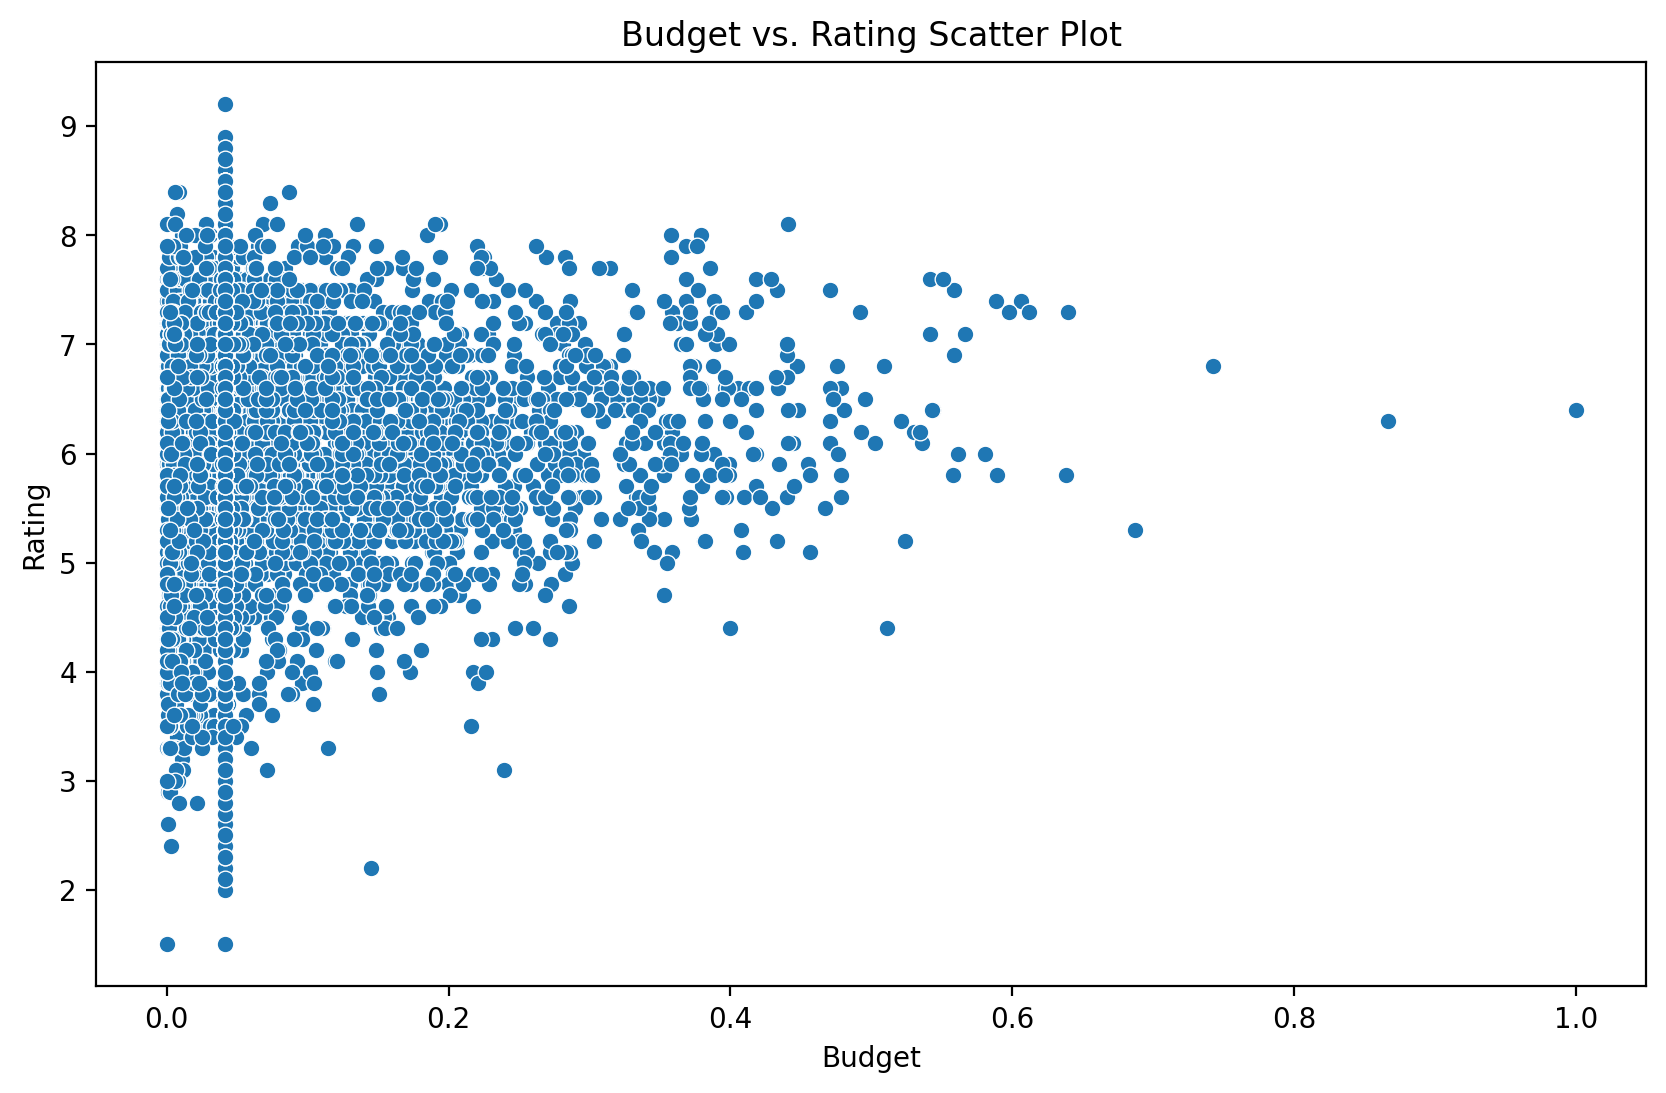

In [76]:
# Create a scatter plot with budget and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget_scaled', y='vote_average')

# Add labels and title
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.title('Budget vs. Rating Scatter Plot')

# Show the plot
plt.show()

The scatterplot reveals no obvious trend here. This means that budget does not affect rating.



<ipython-input-77-fb74d1e3eeef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


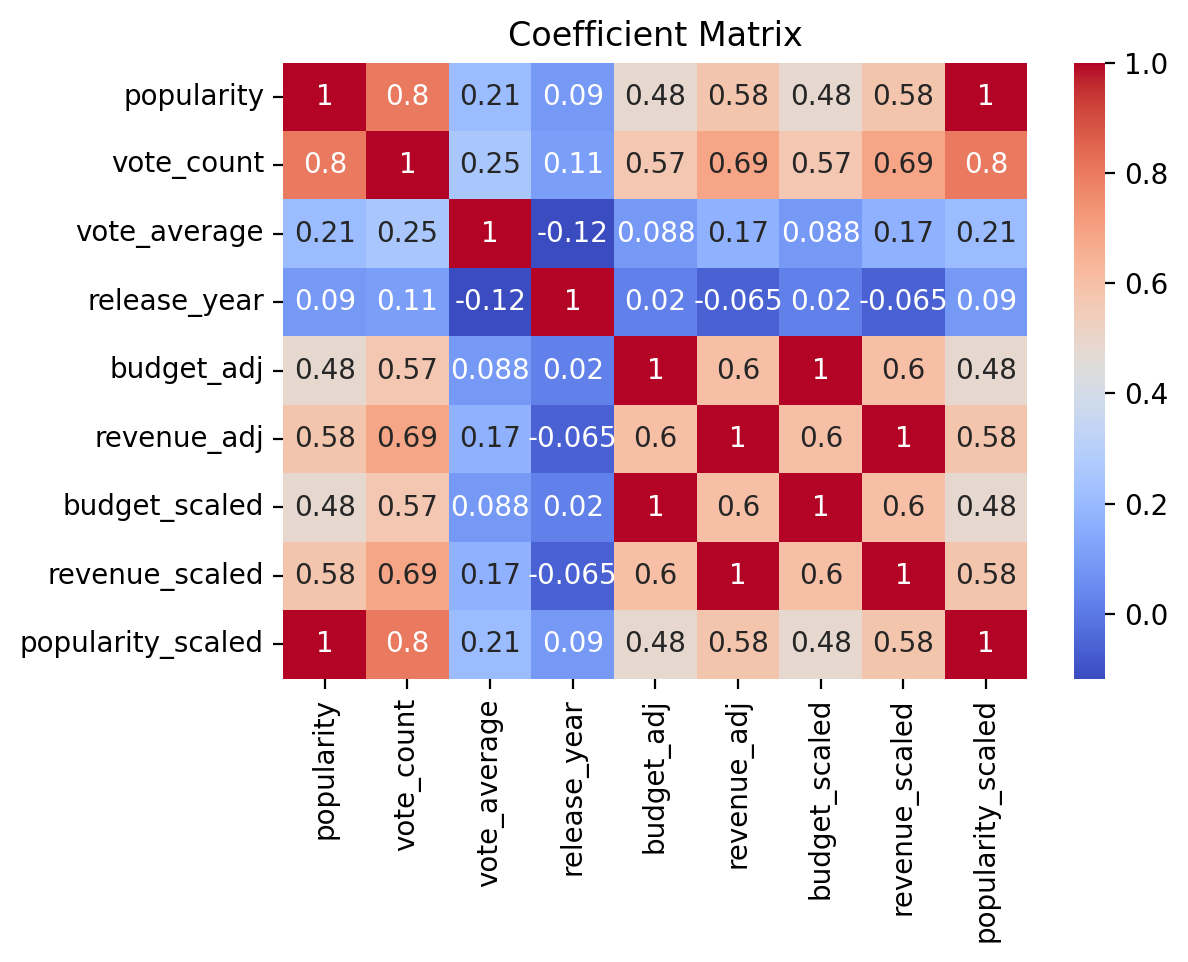

In [77]:
plot_correlation_heatmap(df)

This heatmap's correlation coefficicient also shows no relationship between budget and rating at 0.02, whch also means there is no correlation.

In [78]:
# Filter movies from the last five years
current_year = 2015
last_five_years = current_year -5
filtered_df = df[df['release_year'] >= last_five_years]



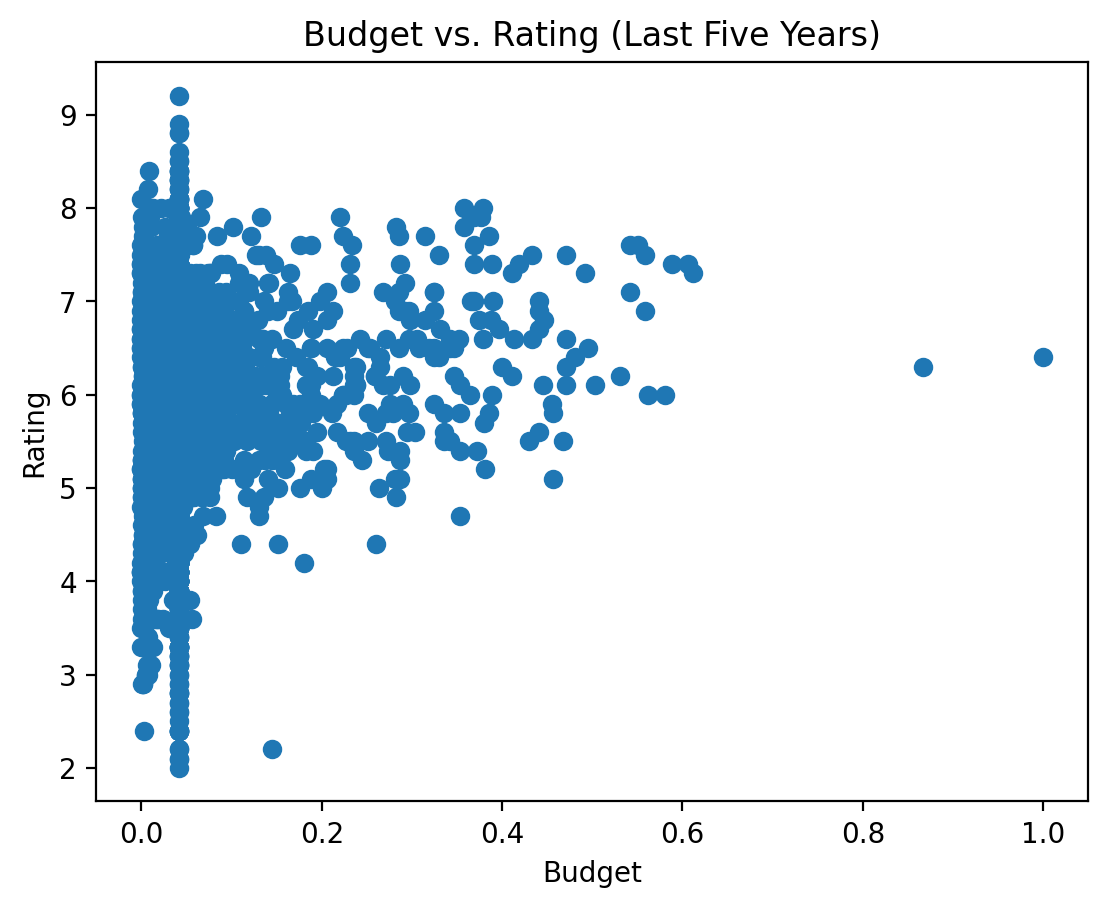

In [79]:
# Scatter plot of budget vs. rating
plt.scatter(filtered_df['budget_scaled'], filtered_df['vote_average'])
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.title('Budget vs. Rating (Last Five Years)')

# Show the plot
plt.show()

I tried focusing on the last five years but there scatterplot once again shows no trend at all.

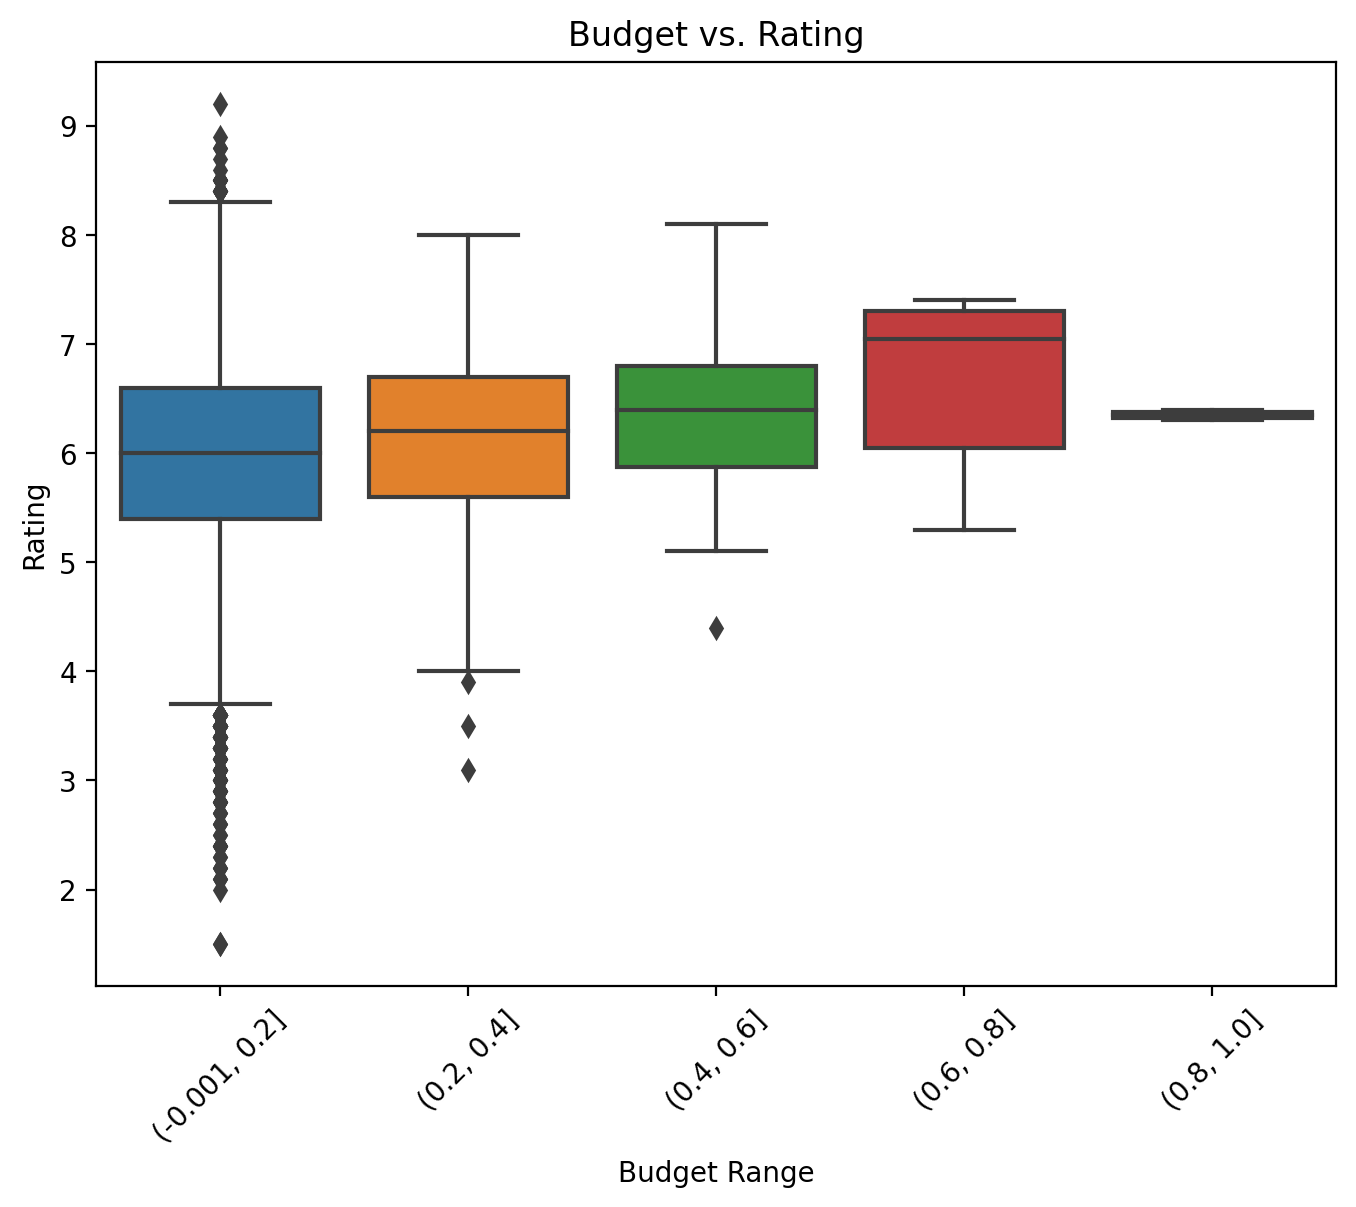

In [80]:
# Create a box plot of ratings grouped by budget ranges
df['budget_range'] = pd.cut(df['budget_scaled'], bins=5)  # Divide the budget into 5 ranges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='budget_range', y='vote_average')
plt.xlabel('Budget Range')
plt.ylabel('Rating')
plt.title('Budget vs. Rating')
plt.xticks(rotation=45)
plt.show()

The box plot shows a lot of outliers in the first box indicating that the lowest budget has both the highest and the lowest ratings in the dataset. The outliers might play a factor where budget could influence ratings, albeit not entirely.

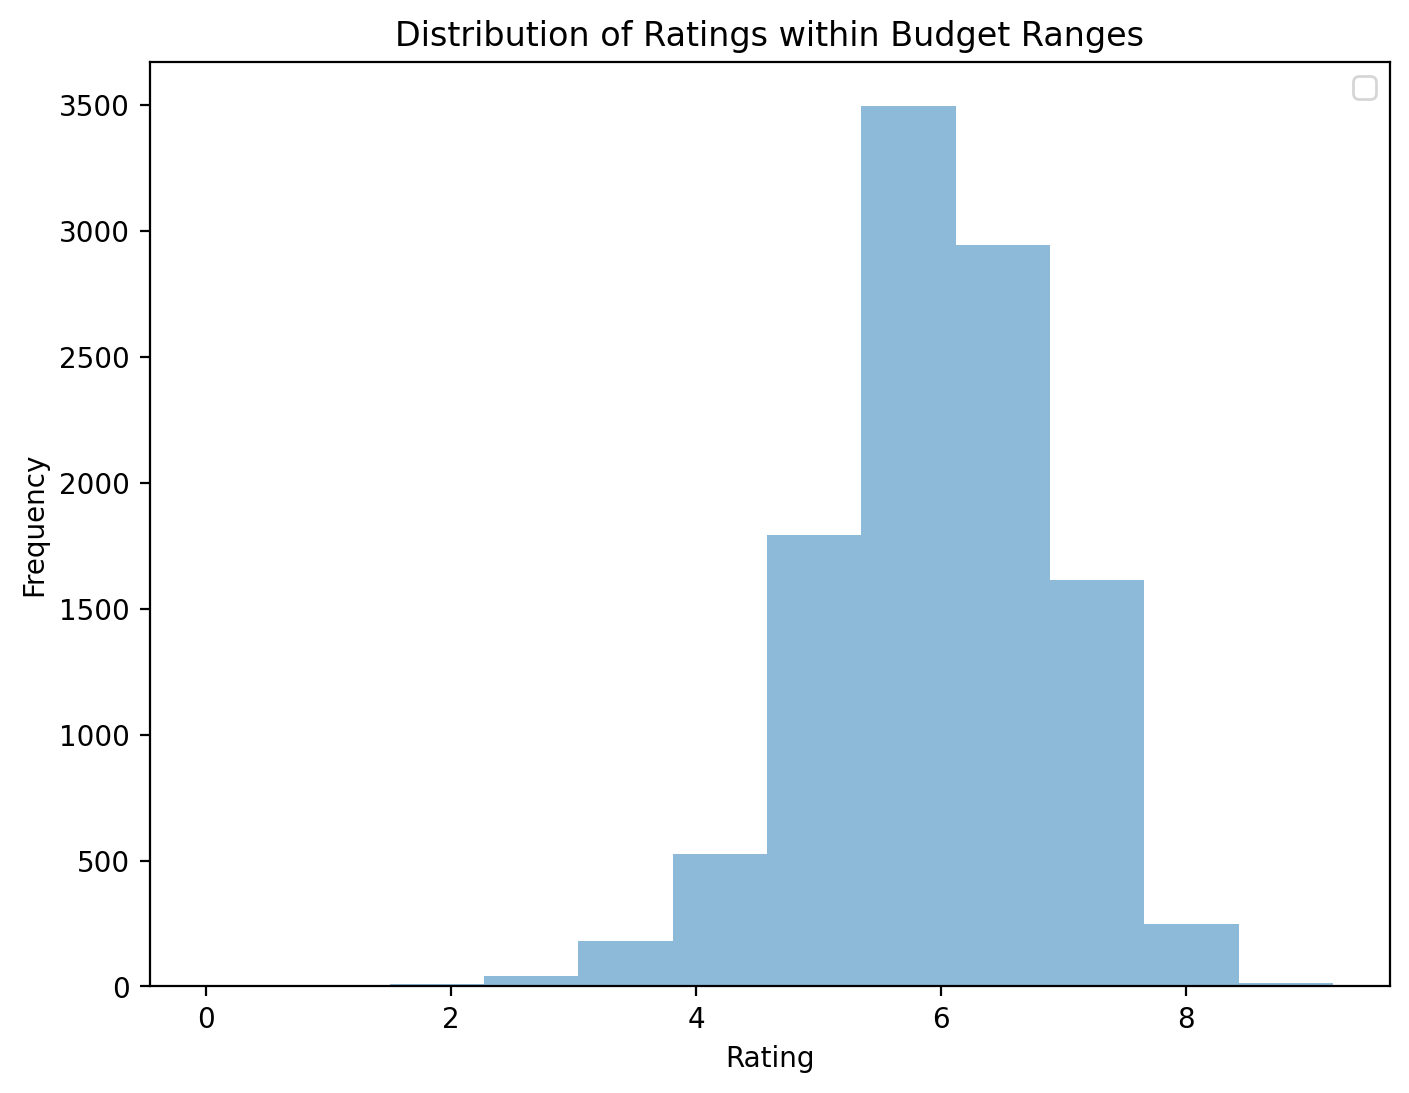

In [81]:

# Divide the data into budget ranges
budget_ranges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create a histogram for each budget range
plt.figure(figsize=(8, 6))
for i in range(len(budget_ranges) - 1):
    subset = df[(df['budget_scaled'] >= budget_ranges[i]) & (df['budget_scaled'] < budget_ranges[i+1])]
    plt.hist(subset['vote_average'], bins=10, alpha=0.5)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings within Budget Ranges')
plt.legend()
plt.show()

### Research Question 2: Are newer movies more likely to receive higher ratings?

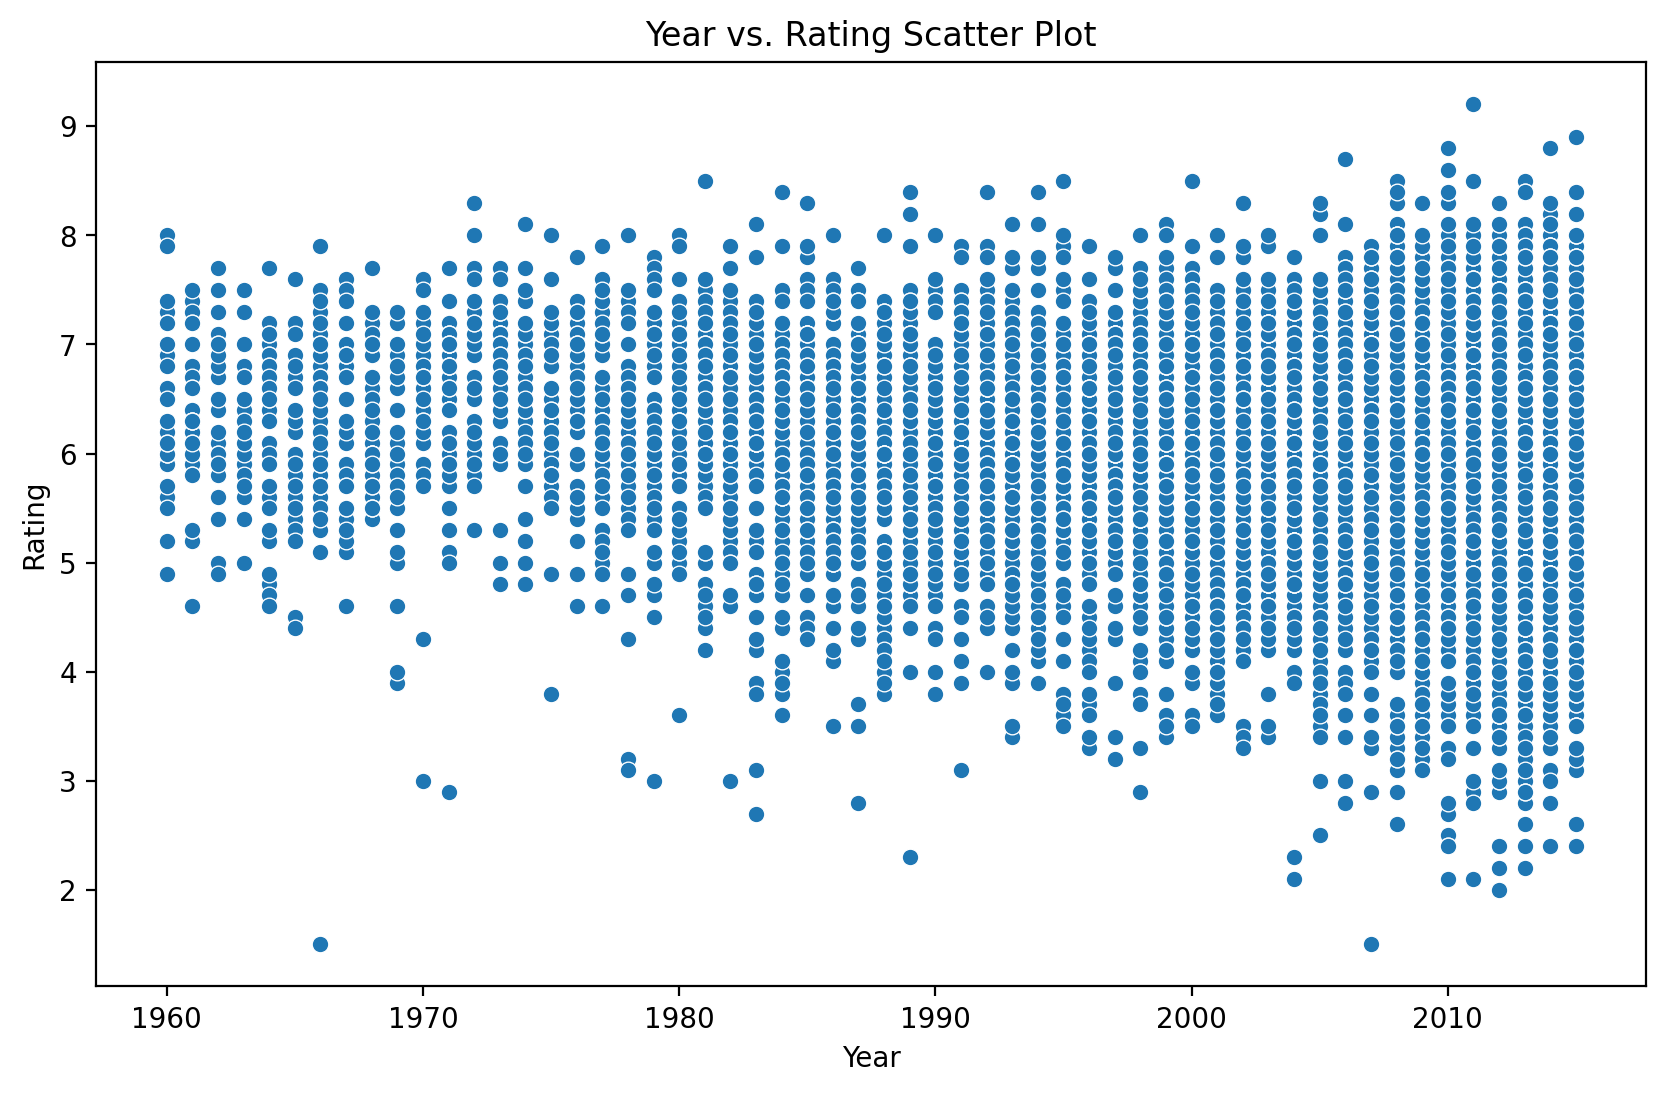

In [88]:
# Create a scatter plot with director and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='vote_average')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Year vs. Rating Scatter Plot')

# Show the plot
plt.show()

The scatterplot reveals no obvious trend here. This means that release year does not affect rating.



<ipython-input-83-fb74d1e3eeef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


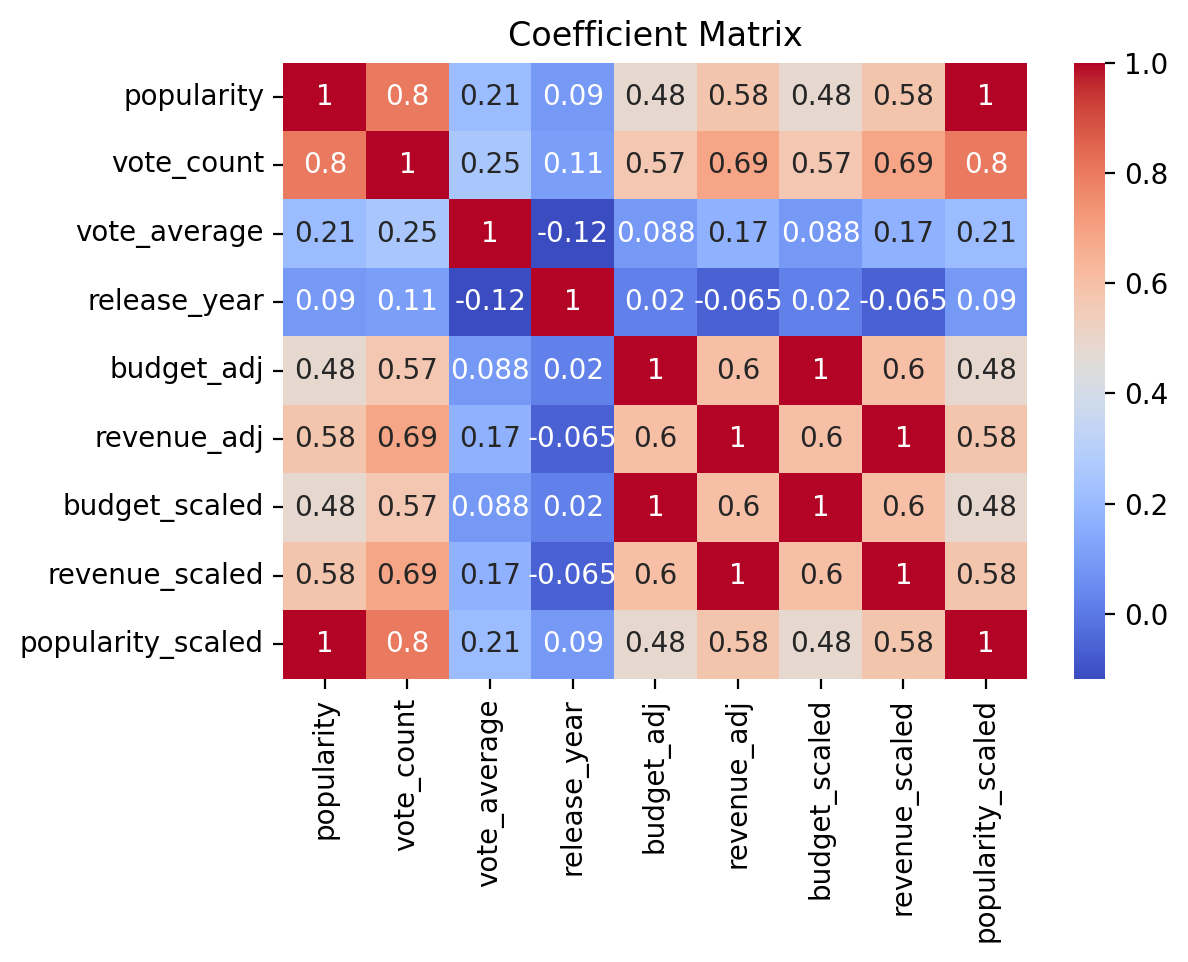

In [83]:
plot_correlation_heatmap(df)

This heatmap's correlation coefficicient also shows no relationship between release year and rating at -0.12, whch also means there is no correlation.

In [84]:
# Filter movies from the last five years
current_year = 2015
last_five_years = current_year -5
filtered_df = df[df['release_year'] >= last_five_years]



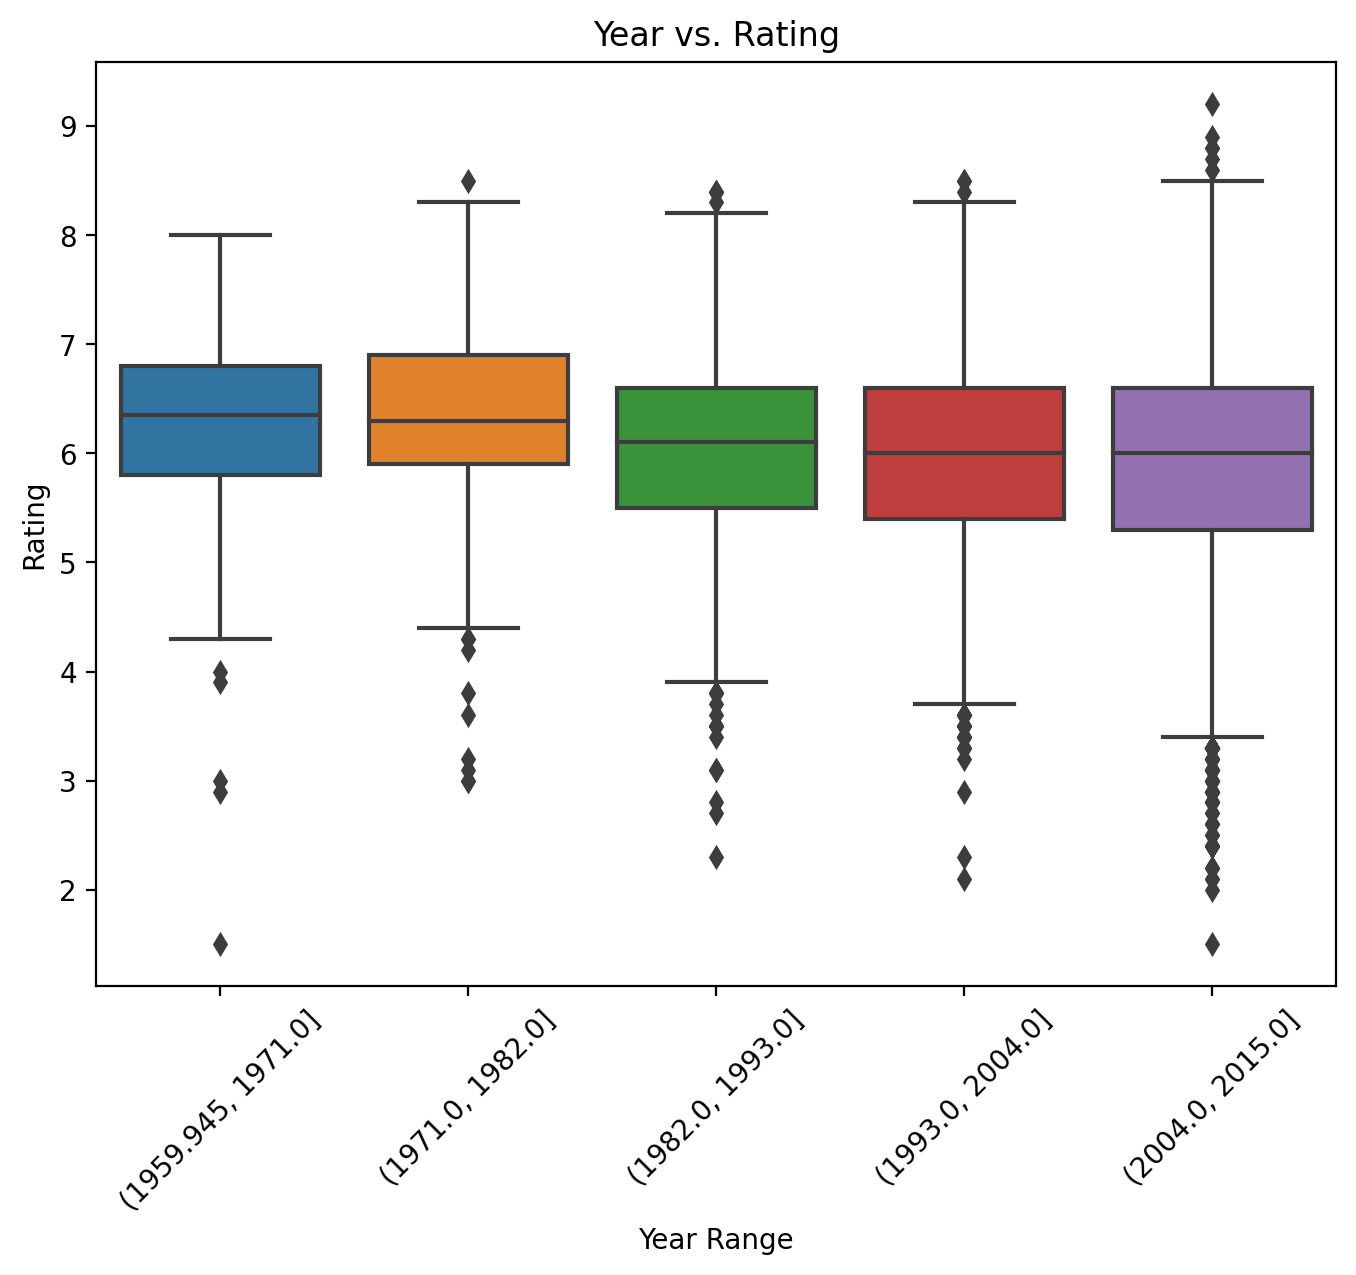

In [91]:
# Create a box plot of ratings grouped by budget ranges
df['year_range'] = pd.cut(df['release_year'], bins=5)  # Divide the budget into 5 ranges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='year_range', y='vote_average')
plt.xlabel('Year Range')
plt.ylabel('Rating')
plt.title('Year vs. Rating')
plt.xticks(rotation=45)
plt.show()

The box plot shows a lot of outliers in the last box indicating that the newcomer movies have both the highest and the lowest ratings in the dataset with the highest margin. The outliers might play a factor where release year could influence ratings, albeit not entirely.

<a id='conclusions'></a>
## Conclusions


> Research Question 1: Does a higher budget lead to better ratings?

Not necessarily. The scatterplot does not show any linear trends. However, the heatmap gave a weak positive relatioship, indicating it might have play a weak factor. The result of the box plot is similar to the scatter plot, again indicating no clear trend.

To isolate the case further, the last five years were studied as well to observe for trends but no trends has emerged.



> Research Question 2: Are newer movies more likely to receive higher ratings?

While the scatter plot hasn't given us any insights, the box plot does indicate that the year a movie is released plays a small factor in its rating.


One limitation of the analysis or data in general is the presence of missing or incomplete data. Missing data can lead to biased or inaccurate results and affect the overall interpretation of findings. To overcome this limitation, various steps can be taken such as data imputation techniques to fill in missing values, subgroup analysis to identify patterns or biases in the missing data, sensitivity analysis to assess the impact of missing data on results, and collecting additional data to reduce reliance on imputation. The choice of approach depends on the specific context and nature of the missing data, and it is essential to consult with experts to ensure a rigorous and reliable analysis.
